In [28]:
import numpy as np
import copy
import random
import math

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read crater dada
crater_map = np.load('crater_map.npy')
NR, NC = crater_map.shape
SCALE = 10.045

In [4]:
# Define the rover class
class Rover():
    """
    This class represents the current position of the rover in relation
    to its surroundings.
    """
    def __init__(self, crater_map, position, prev_positions):
        """
        We will take in the map of the area and the rover's current position.
        ---
        crater_map: numpy array
        start_position: tuple like (x, y) WITH MATRIX COORDINATES
        end_position: tuple like (x, y)
        ---
        Everytime the rover moves, it adds to a list its previous positions.
        """
        self.crater_map = copy.copy(crater_map)
        self.position = position
        self.current_row = self.position[0]
        self.current_column = self.position[1]
        self.prev_positions = prev_positions
        self.prev_positions.append(self.position)
        
    def show(self):
        """ Plots the points where the rover has traveled """
        fig = plt.figure(figsize=(16, 9))
        ax = fig.add_subplot()
        sns.heatmap(crater_map, cmap='hot')
        ax.set_xlim(200, 400)
        ax.set_ylim(450, 700)
        for i in range(len(self.prev_positions) - 1):
            ax.plot(
                [self.prev_positions[i][1], self.prev_positions[i + 1][1]],
                [self.prev_positions[i][0], self.prev_positions[i + 1][0]],
                color='cyan'
            );
        return ax
    
    def cost(self):
        """
        Returns current height. Lower is better
        """
        return self.crater_map[self.current_row][self.current_column]
    
    def neighbour(self):
        """
        Returns a random neighbour from a given state. The neighbour must havea height
        difference less than 2m.
        """
        current_height = self.crater_map[self.current_row][self.current_column]
        directions = []
        # UL
        if abs(current_height - self.crater_map[self.current_row - 1][self.current_column - 1]) <= 2:
            directions.append((self.current_row - 1, self.current_column - 1))
        # UU
        if abs(current_height - self.crater_map[self.current_row - 1][self.current_column]) <= 2:
            directions.append((self.current_row - 1, self.current_column))
        # UR
        if abs(current_height - self.crater_map[self.current_row - 1][self.current_column + 1]) <= 2:
            directions.append((self.current_row - 1, self.current_column + 1))
        # LL
        if abs(current_height - self.crater_map[self.current_row][self.current_column - 1]) <= 2:
            directions.append((self.current_row, self.current_column - 1))
        # RR
        if abs(current_height - self.crater_map[self.current_row][self.current_column + 1]) <= 2:
            directions.append((self.current_row, self.current_column + 1))
        # DL
        2
        if abs(current_height - self.crater_map[self.current_row + 1][self.current_column - 1]) <= 2:
            directions.append((self.current_row + 1, self.current_column - 1))
        # DD
        if abs(current_height - self.crater_map[self.current_row + 1][self.current_column]) <= 2:
            directions.append((self.current_row + 1, self.current_column))
        # DR
        if abs(current_height - self.crater_map[self.current_row + 1][self.current_column + 1]) <= 2:
            directions.append((self.current_row + 1, self.current_column + 1))

        new_position = random.choice(directions)
        self.prev_positions.append(new_position)
        new_rover = Rover(self.crater_map, new_position, copy.copy(self.prev_positions))

        return new_rover

In [5]:
def get_row(nr: int, y: int, scale: float) -> int:
    """
    Returns the row number inside the mars map for a given 'y'
    coordinate.
    ---
    nr: total number of rows inside the mars map
    y: the y coordinate we want to find
    scale: the scale at which the map is scaled
    ---
    Returns -> int representing the row at which the 'y' coordinate is found
    """
    return nr - round(y / scale)

def get_column(x: int, scale: float) -> int:
    """
    Returns the column number inside the mars map for a given 'x'
    coordinate.
    ---
    x: the x coordinate we want to find
    scale: the scale at which the map is scaled
    1
    ---
    Returns -> int representing the row at which the 'x' coordinate is found
    """
    return round(x / scale)

In [6]:
def hill_climbing(initial_row, initial_column, initial_rover):
    # Hill climbing
    hill_climb_rover = initial_rover
    cost = hill_climb_rover.cost()
    step = 0

    print(f"Iteration: {step} | Cost: {cost}")
    while cost > 0 and step < 100:
        # Get new neighbour and cost
        neighbour = hill_climb_rover.neighbour()
        new_cost = neighbour.cost()
        # Check if cost is less
        if new_cost < cost:
            hill_climb_rover = neighbour
            cost = new_cost

        step += 1

        if step % 10 == 0:
            print(f"Iteration: {step} | Cost: {cost}")

    print("\nFinal Route")
    hill_climb_rover.show();

In [25]:
def simulated_annealing(initial_row, initial_column, initial_rover):
    sim_ann_rover = initial_rover
    cost = sim_ann_rover.cost()
    step = 0
    alpha = 0.9995
    t0 = 20
    t = t0

    print(f"Iteration: {step} | Cost: {cost} | Temperature: {t:.5f}")
    while t > 0.05 and cost > 1:
        # Calculate temperature
        t = t0 * math.pow(alpha, step)
        step += 1
        
        # Get random neighbour
        neighbour = sim_ann_rover.neighbour()
        new_cost = neighbour.cost()
        
        # Test neighbour
        if new_cost < cost:
            sim_ann_rover = neighbour
            cost = new_cost
        else:
            p = math.exp(-(new_cost - cost) / t)
            if p >= random.random():
                sim_ann_rover = neighbour
                cost = new_cost
        
        if step % 2500 == 0:
            print(f"Iteration: {step} | Cost: {cost} | Temperature: {t:.5f}")
    
    print(f"Iteration: {step} | Cost: {cost} | Temperature: {t:.5f}")
    print("\nFinal Route")
    sim_ann_rover.show();

### Greedy Search with Hill Climbing

In [7]:
# Convert initial position to matrix coordinates
initial_x = 3350
initial_y = 5800
initial_row = get_row(NR, initial_y, SCALE)
initial_column = get_column(initial_x, SCALE)

Initial cost: 117.02547363281272


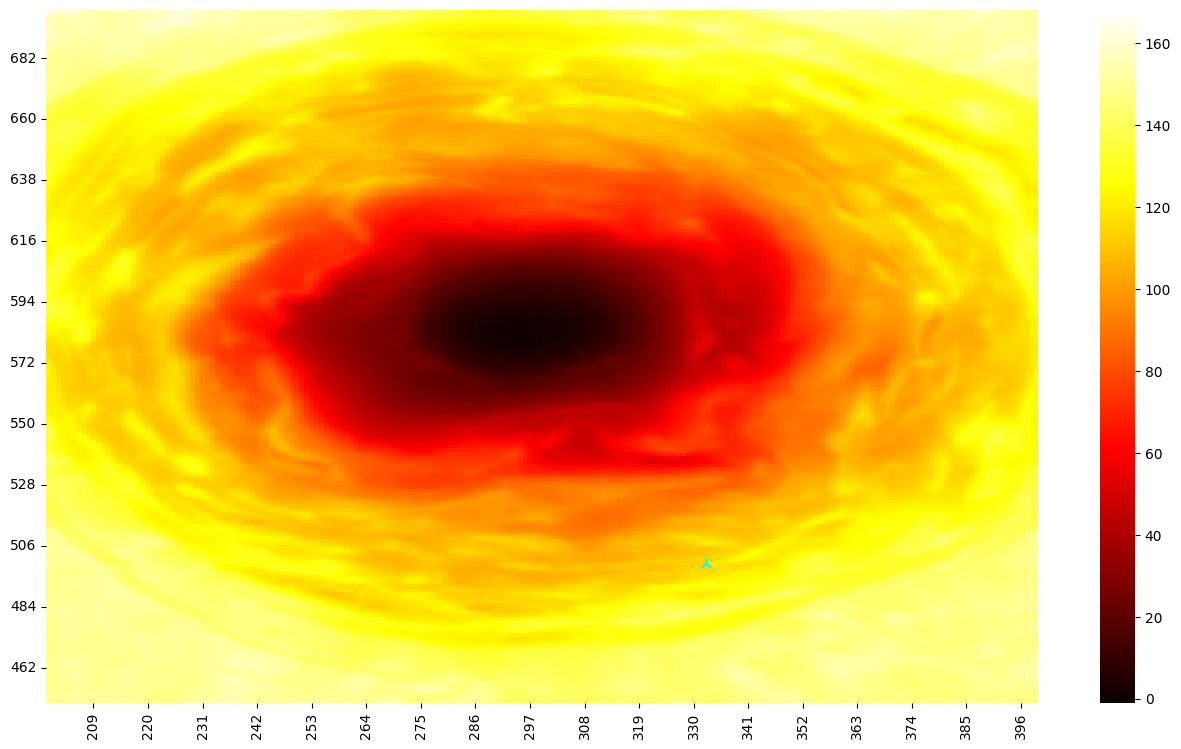

In [8]:
initial_rover = Rover(crater_map, (initial_row, initial_column), [])
initial_rover.show();
plt.scatter(333, 500, marker='2', s=80, color='cyan')
print(f"Initial cost: {initial_rover.cost()}")

Iteration: 0 | Cost: 117.02547363281272
Iteration: 10 | Cost: 114.24548339843771
Iteration: 20 | Cost: 112.74506347656272
Iteration: 30 | Cost: 109.90888183593772
Iteration: 40 | Cost: 109.25696289062522
Iteration: 50 | Cost: 109.25696289062522
Iteration: 60 | Cost: 109.25696289062522
Iteration: 70 | Cost: 109.25696289062522
Iteration: 80 | Cost: 109.25696289062522
Iteration: 90 | Cost: 109.25696289062522
Iteration: 100 | Cost: 109.25696289062522

Final Route


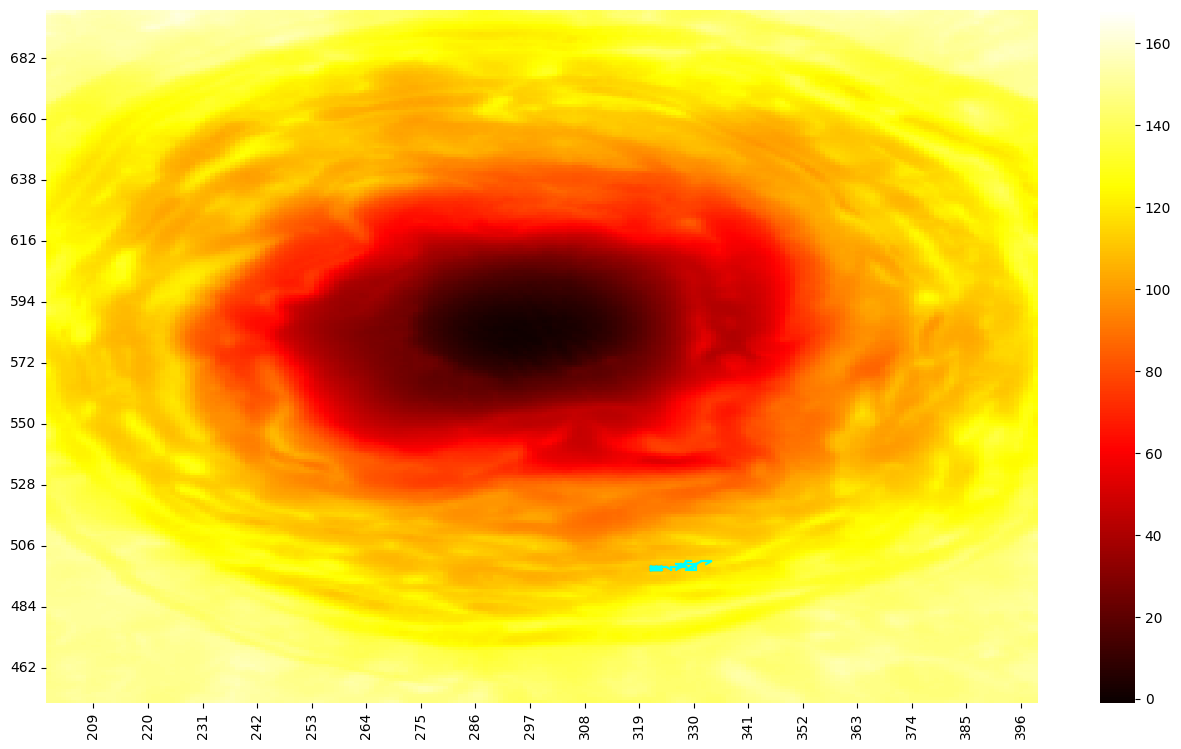

In [9]:
hill_climbing(initial_row, initial_column, initial_rover)

#### Different Initial Conditions

In [10]:
custom_points = [
    (2450, 4800),
    (3000, 4750),
    (3200, 4100),
    (2600, 5000),
    (3600, 6120)
]

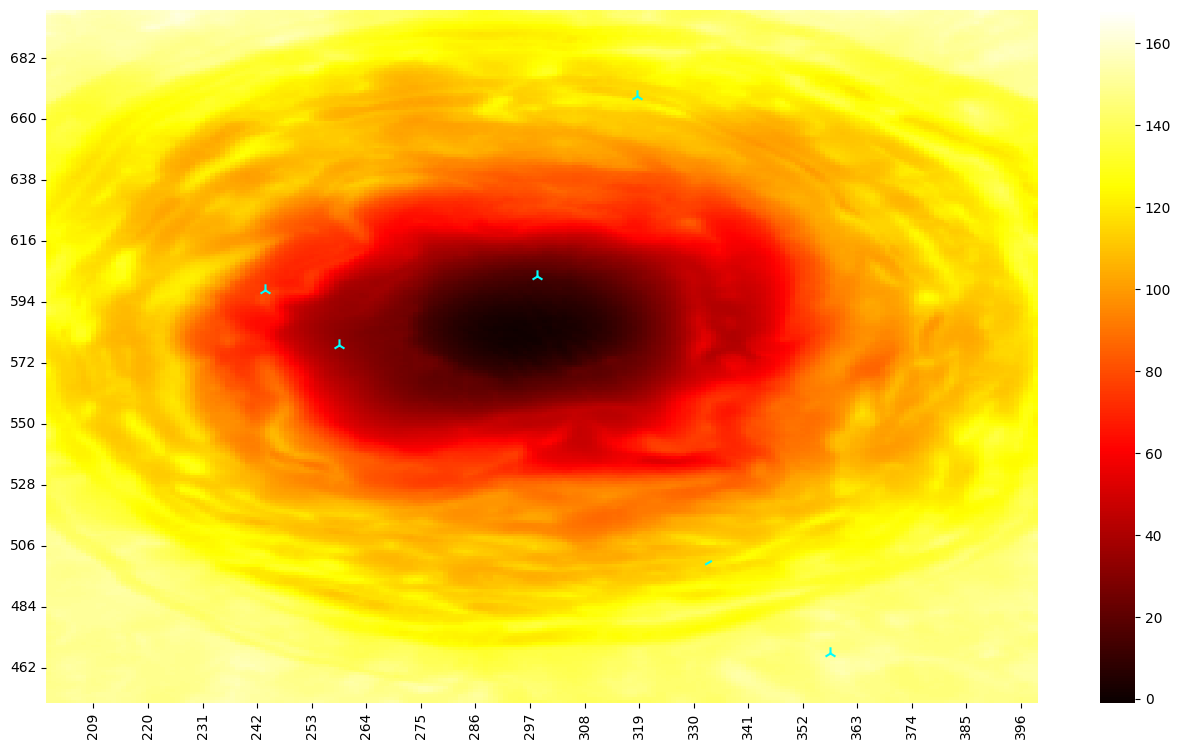

In [11]:
initial_rover.show();
for i in custom_points:
    row = get_row(NR, i[1], SCALE)
    column = get_column(i[0], SCALE)
    plt.scatter(column, row, marker='2', s=80, color='cyan')

Iteration: 0 | Cost: 73.97523925781272
Iteration: 10 | Cost: 71.99525878906272
Iteration: 20 | Cost: 70.03653320312522
Iteration: 30 | Cost: 67.68876464843771
Iteration: 40 | Cost: 67.47635498046897
Iteration: 50 | Cost: 67.47635498046897
Iteration: 60 | Cost: 67.47635498046897
Iteration: 70 | Cost: 67.47635498046897
Iteration: 80 | Cost: 67.47635498046897
Iteration: 90 | Cost: 67.47635498046897
Iteration: 100 | Cost: 67.47635498046897

Final Route


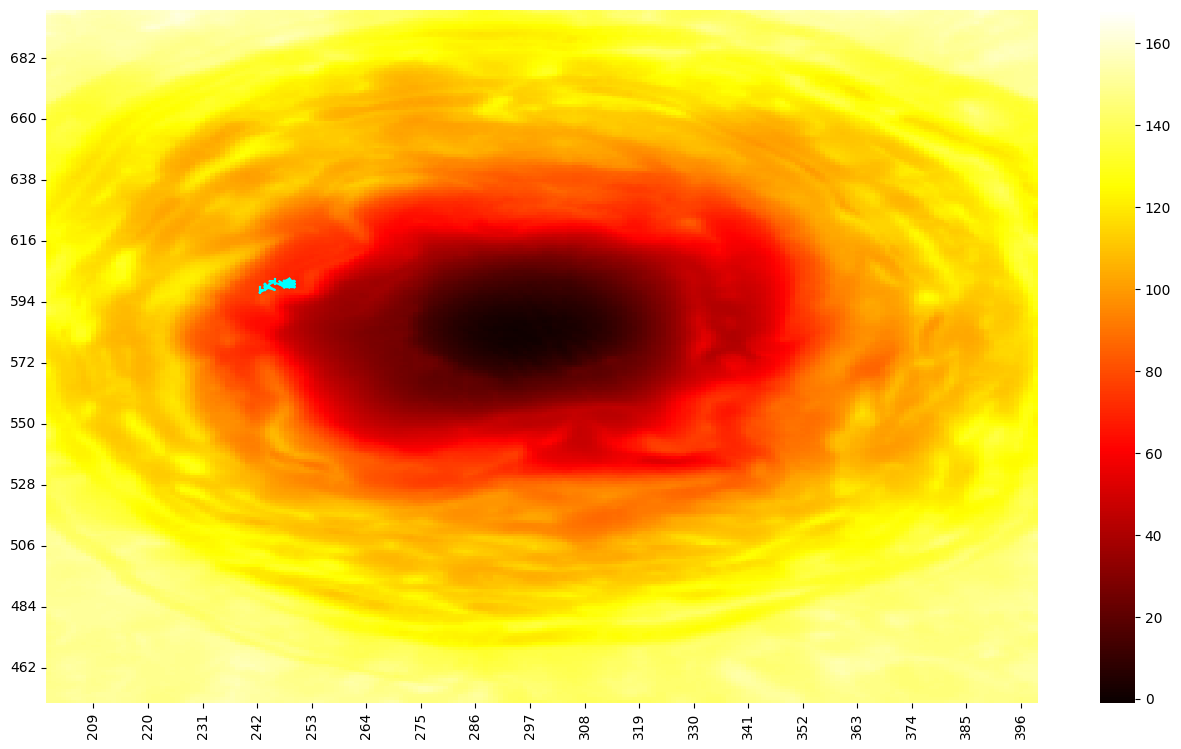

In [18]:
initial_row = get_row(NR, custom_points[0][1], SCALE)
initial_column = get_column(custom_points[0][0], SCALE)
initial_rover = Rover(crater_map, (initial_row, initial_column), [])
hill_climbing(initial_row, initial_column, initial_rover)

Iteration: 0 | Cost: 15.682854003906469
Iteration: 10 | Cost: 11.097604980468969
Iteration: 20 | Cost: 8.40298339843772
Iteration: 30 | Cost: 5.359545898437719
Iteration: 40 | Cost: 2.7635595703127183
Iteration: 50 | Cost: 2.2845605468752184
Iteration: 60 | Cost: 1.5951806640627182
Iteration: 70 | Cost: 1.5951806640627182
Iteration: 80 | Cost: 1.5951806640627182
Iteration: 90 | Cost: 1.5951806640627182
Iteration: 100 | Cost: 1.5951806640627182

Final Route


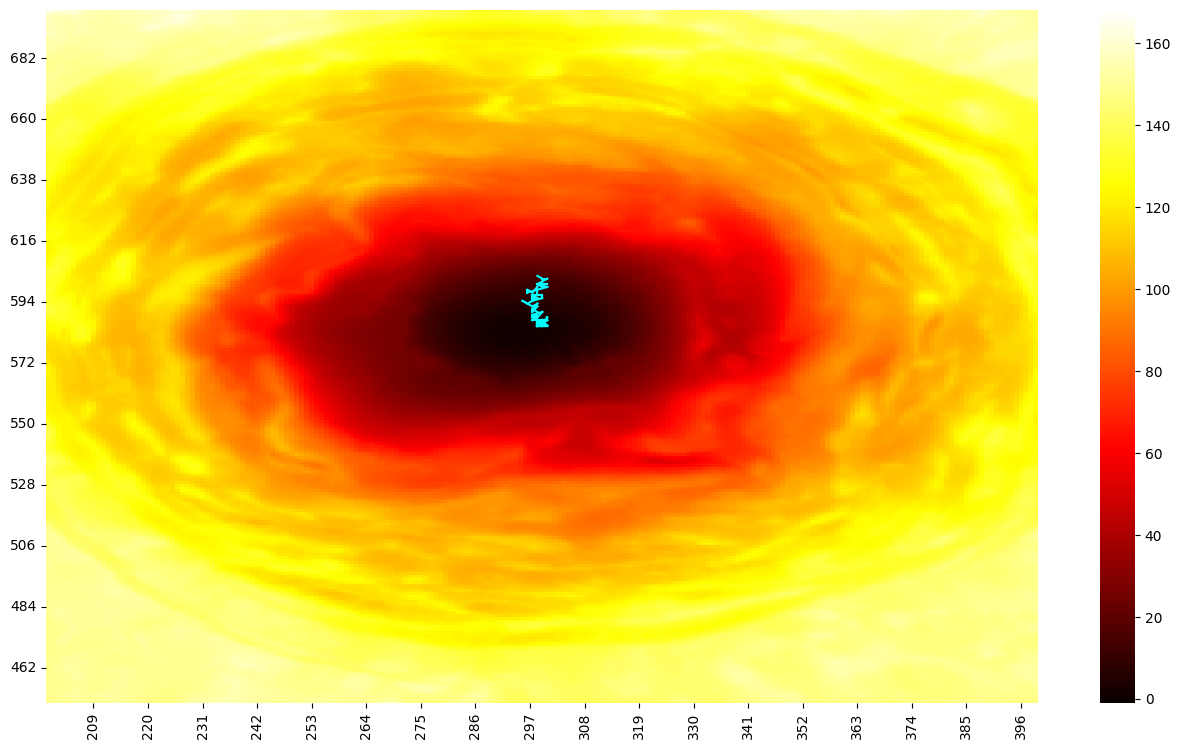

In [19]:
initial_row = get_row(NR, custom_points[1][1], SCALE)
initial_column = get_column(custom_points[1][0], SCALE)
initial_rover = Rover(crater_map, (initial_row, initial_column), [])
hill_climbing(initial_row, initial_column, initial_rover)

Iteration: 0 | Cost: 115.38589355468771
Iteration: 10 | Cost: 115.03412597656272
Iteration: 20 | Cost: 113.31362304687522
Iteration: 30 | Cost: 113.31362304687522
Iteration: 40 | Cost: 113.31362304687522
Iteration: 50 | Cost: 113.31362304687522
Iteration: 60 | Cost: 113.31362304687522
Iteration: 70 | Cost: 113.31362304687522
Iteration: 80 | Cost: 113.31362304687522
Iteration: 90 | Cost: 113.31362304687522
Iteration: 100 | Cost: 113.31362304687522

Final Route


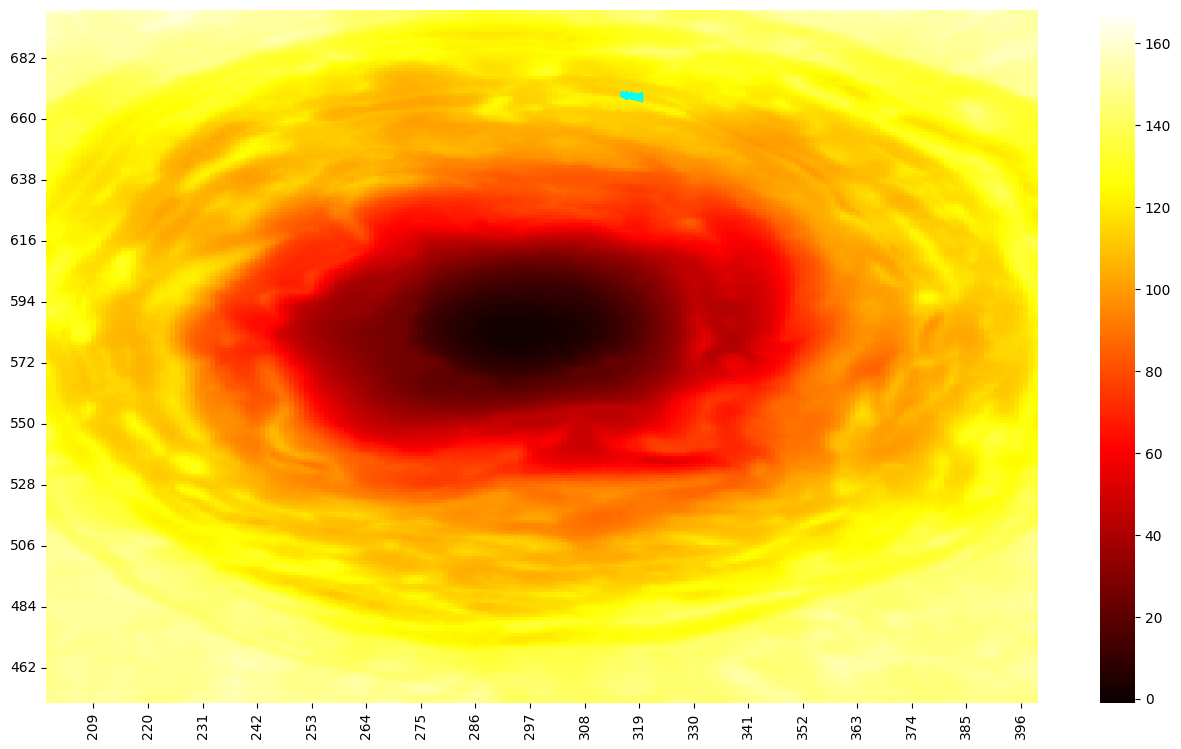

In [20]:
initial_row = get_row(NR, custom_points[2][1], SCALE)
initial_column = get_column(custom_points[2][0], SCALE)
initial_rover = Rover(crater_map, (initial_row, initial_column), [])
hill_climbing(initial_row, initial_column, initial_rover)

Iteration: 0 | Cost: 33.10188720703147
Iteration: 10 | Cost: 30.66920410156272
Iteration: 20 | Cost: 28.33530761718772
Iteration: 30 | Cost: 24.977692871093968
Iteration: 40 | Cost: 18.62685302734397
Iteration: 50 | Cost: 12.978635253906468
Iteration: 60 | Cost: 8.792902832031467
Iteration: 70 | Cost: 3.0851123046877182
Iteration: 80 | Cost: 1.3162207031252182
Iteration: 90 | Cost: 0.8669335937502183
Iteration: 100 | Cost: 0.6949072265627183

Final Route


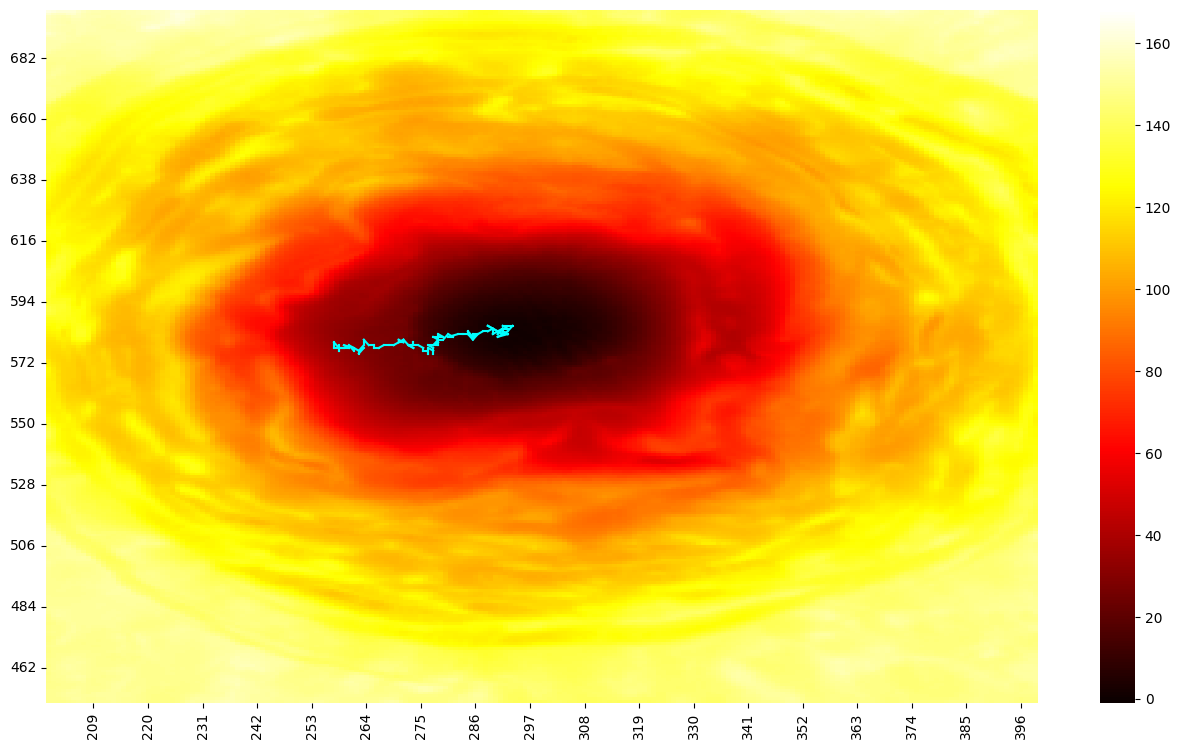

In [21]:
initial_row = get_row(NR, custom_points[3][1], SCALE)
initial_column = get_column(custom_points[3][0], SCALE)
initial_rover = Rover(crater_map, (initial_row, initial_column), [])
hill_climbing(initial_row, initial_column, initial_rover)

Iteration: 0 | Cost: 147.14847412109395
Iteration: 10 | Cost: 145.75047851562522
Iteration: 20 | Cost: 145.75047851562522
Iteration: 30 | Cost: 145.75047851562522
Iteration: 40 | Cost: 145.75047851562522
Iteration: 50 | Cost: 145.75047851562522
Iteration: 60 | Cost: 145.75047851562522
Iteration: 70 | Cost: 145.75047851562522
Iteration: 80 | Cost: 145.75047851562522
Iteration: 90 | Cost: 145.75047851562522
Iteration: 100 | Cost: 145.75047851562522

Final Route


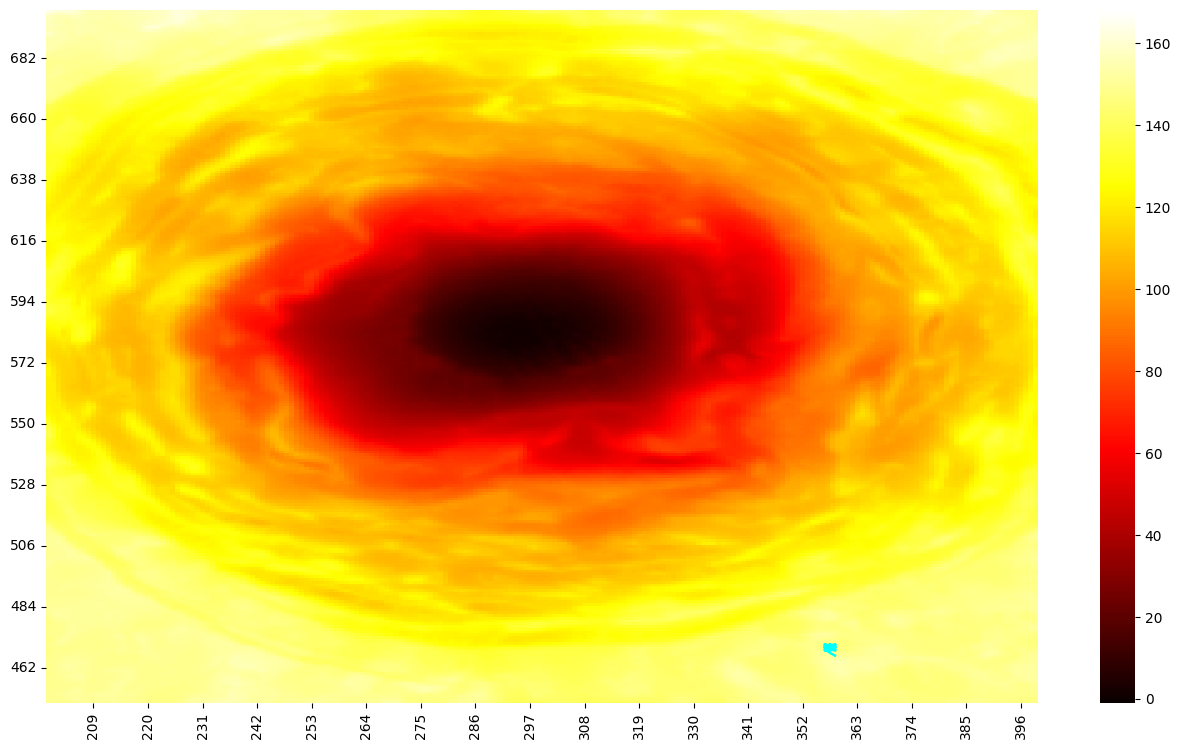

In [22]:
initial_row = get_row(NR, custom_points[4][1], SCALE)
initial_column = get_column(custom_points[4][0], SCALE)
initial_rover = Rover(crater_map, (initial_row, initial_column), [])
hill_climbing(initial_row, initial_column, initial_rover)

### Simulated Annealing Search

In [37]:
random.seed(44)

In [38]:
# Convert initial position to matrix coordinates
initial_x = 3350
initial_y = 5800
initial_row = get_row(NR, initial_y, SCALE)
initial_column = get_column(initial_x, SCALE)

Initial cost: 117.02547363281272


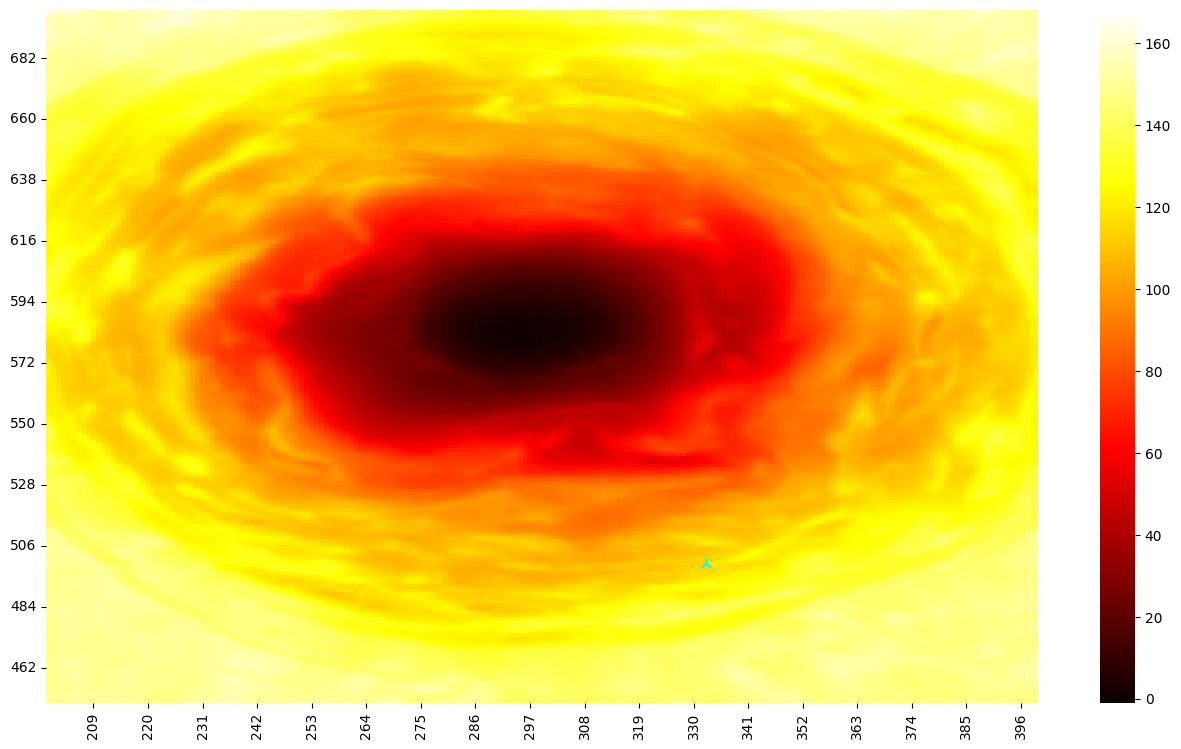

In [39]:
initial_rover = Rover(crater_map, (initial_row, initial_column), [])
initial_rover.show();
plt.scatter(333, 500, marker='2', s=80, color='cyan')
print(f"Initial cost: {initial_rover.cost()}")

Iteration: 0 | Cost: 117.02547363281272 | Temperature: 20.00000
Iteration: 2500 | Cost: 90.32165283203148 | Temperature: 5.73117
Iteration: 5000 | Cost: 53.49548339843772 | Temperature: 1.64149
Iteration: 7500 | Cost: 52.69659179687522 | Temperature: 0.47015
Iteration: 10000 | Cost: 52.62242919921897 | Temperature: 0.13466
Iteration: 11981 | Cost: 52.62242919921897 | Temperature: 0.05000

Final Route


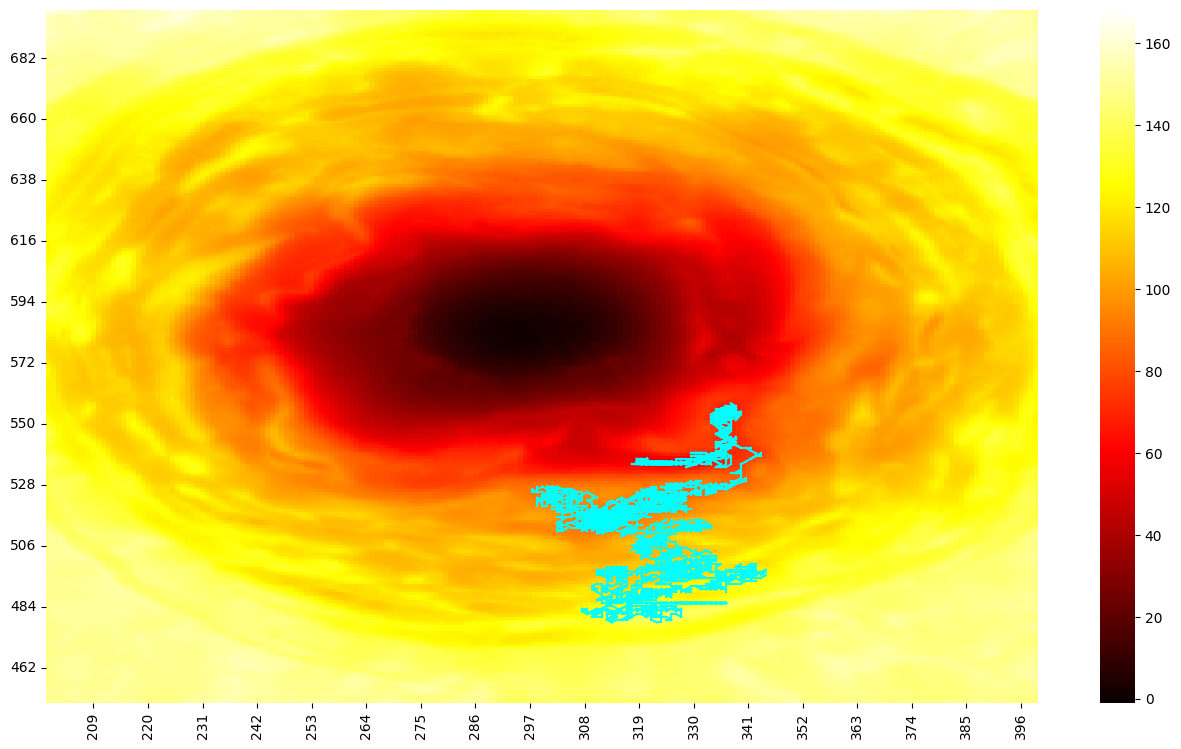

In [40]:
simulated_annealing(initial_row, initial_column, initial_rover)

Iteration: 0 | Cost: 73.97523925781272 | Temperature: 20.00000
Iteration: 2500 | Cost: 81.99791259765647 | Temperature: 5.73117
Iteration: 5000 | Cost: 69.41835693359397 | Temperature: 1.64149
Iteration: 7500 | Cost: 68.05814941406271 | Temperature: 0.47015
Iteration: 10000 | Cost: 67.90921386718772 | Temperature: 0.13466
Iteration: 11981 | Cost: 67.47635498046897 | Temperature: 0.05000

Final Route


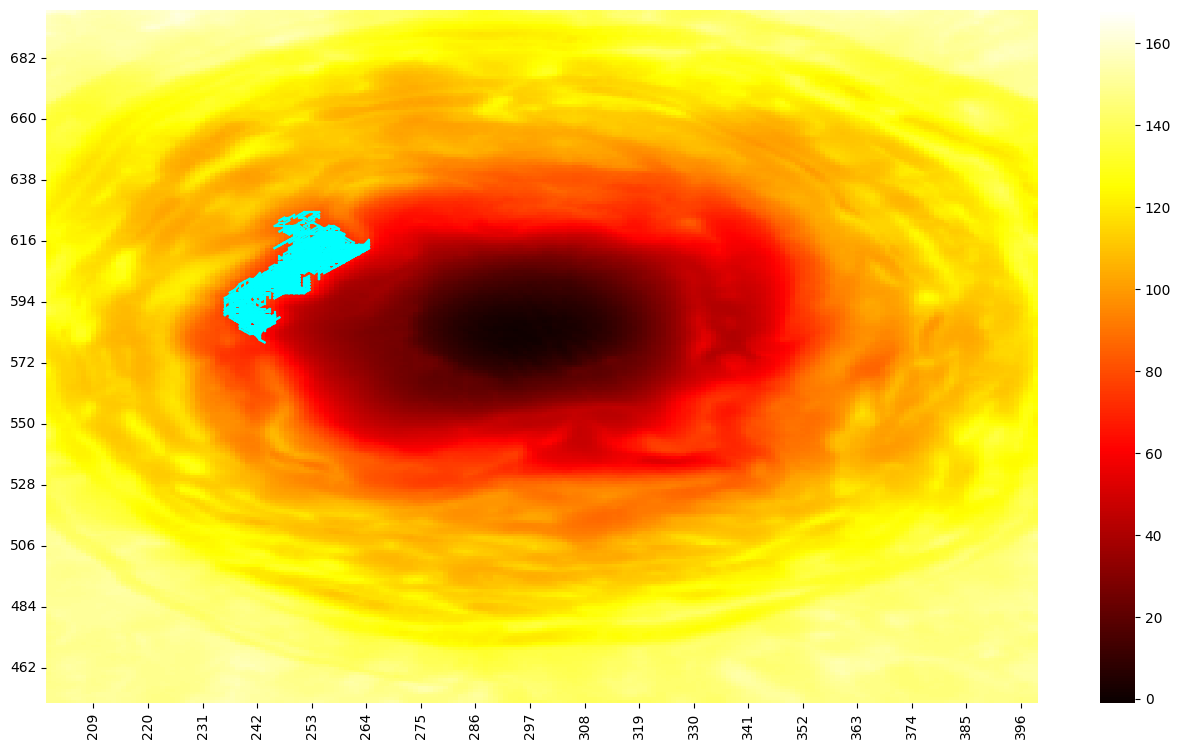

In [41]:
initial_row = get_row(NR, custom_points[0][1], SCALE)
initial_column = get_column(custom_points[0][0], SCALE)
initial_rover = Rover(crater_map, (initial_row, initial_column), [])
simulated_annealing(initial_row, initial_column, initial_rover)

Iteration: 0 | Cost: 15.682854003906469 | Temperature: 20.00000
Iteration: 133 | Cost: 0.8547412109377183 | Temperature: 18.72231

Final Route


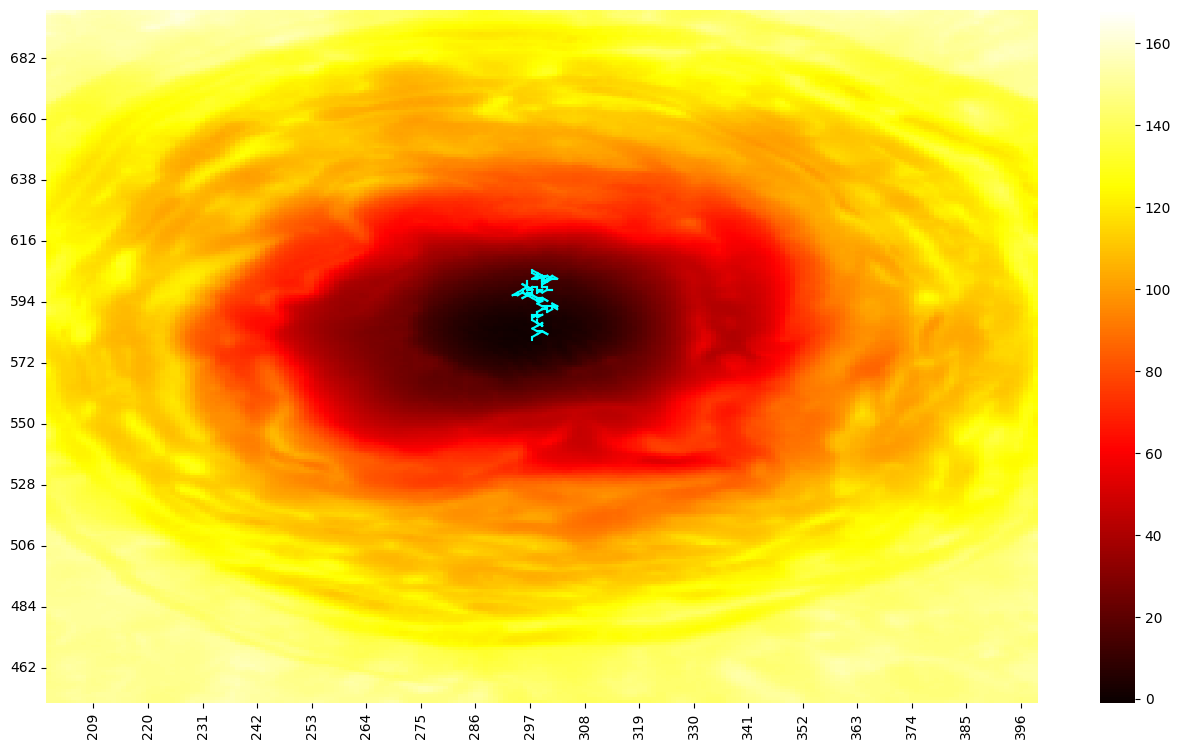

In [42]:
initial_row = get_row(NR, custom_points[1][1], SCALE)
initial_column = get_column(custom_points[1][0], SCALE)
initial_rover = Rover(crater_map, (initial_row, initial_column), [])
simulated_annealing(initial_row, initial_column, initial_rover)

Iteration: 0 | Cost: 115.38589355468771 | Temperature: 20.00000
Iteration: 2500 | Cost: 101.70183105468772 | Temperature: 5.73117
Iteration: 5000 | Cost: 10.435078125000219 | Temperature: 1.64149
Iteration: 5077 | Cost: 0.9989306640627182 | Temperature: 1.57948

Final Route


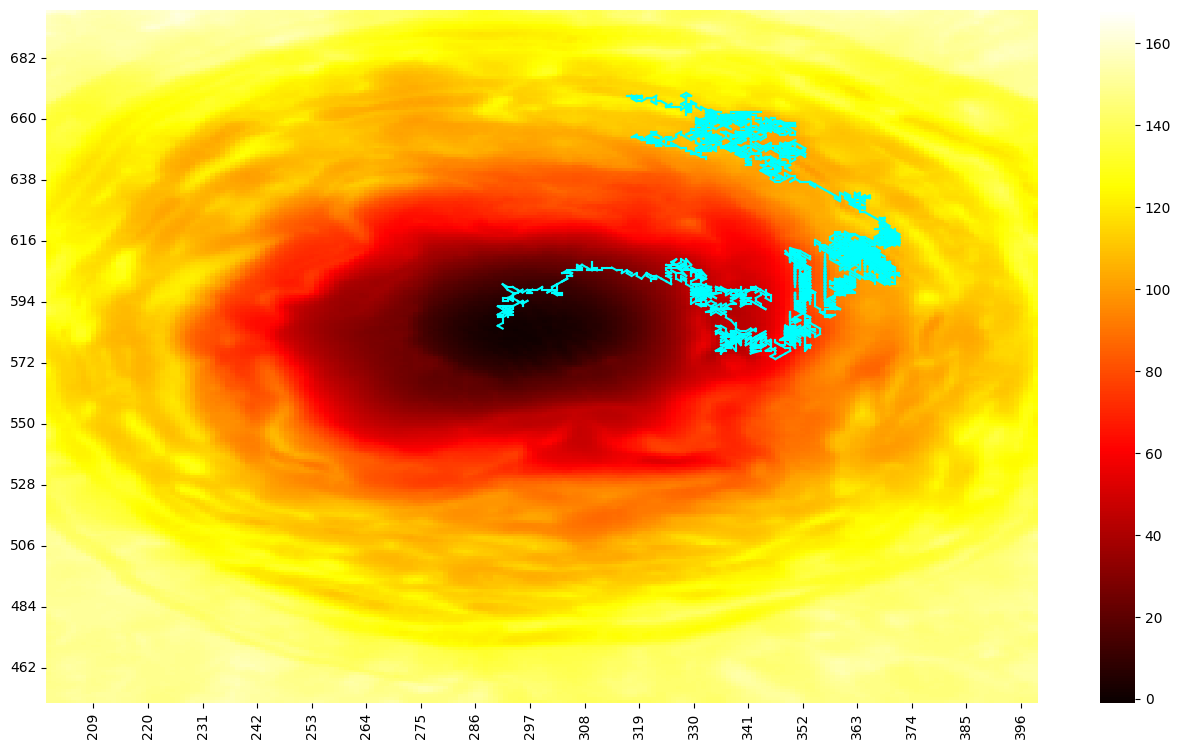

In [43]:
initial_row = get_row(NR, custom_points[2][1], SCALE)
initial_column = get_column(custom_points[2][0], SCALE)
initial_rover = Rover(crater_map, (initial_row, initial_column), [])
simulated_annealing(initial_row, initial_column, initial_rover)

Iteration: 0 | Cost: 33.10188720703147 | Temperature: 20.00000
Iteration: 1818 | Cost: 0.5624267578127182 | Temperature: 8.06074

Final Route


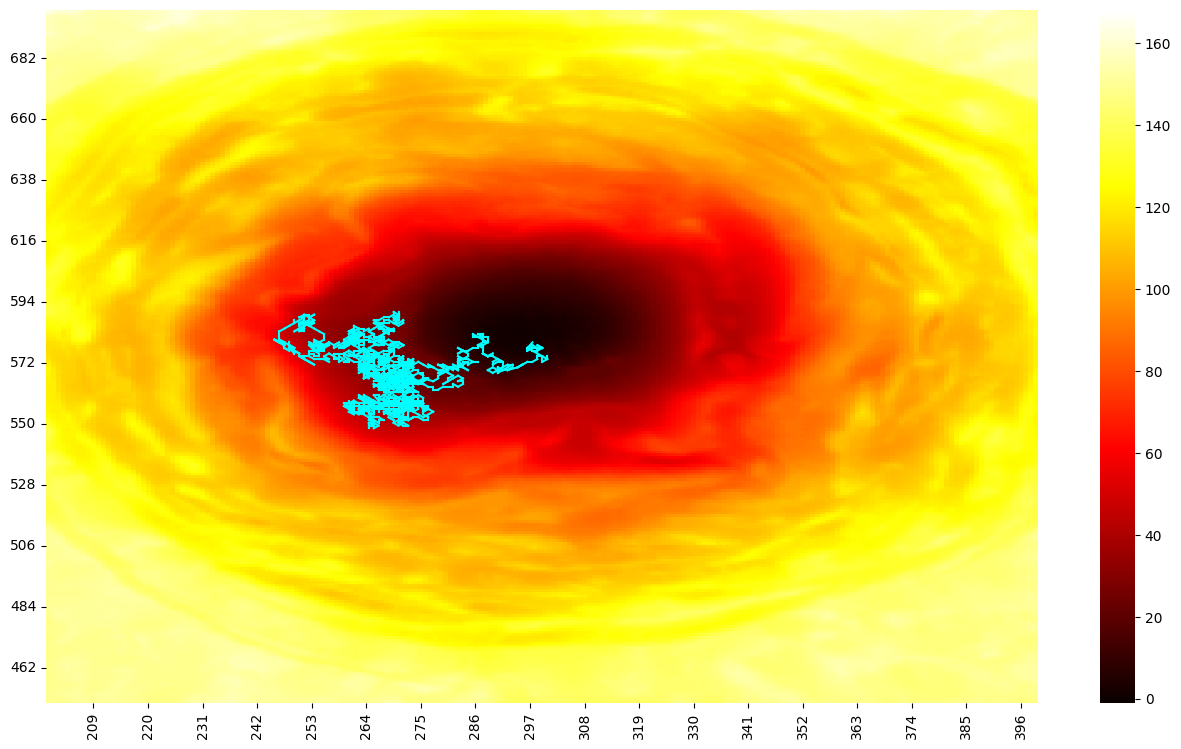

In [44]:
initial_row = get_row(NR, custom_points[3][1], SCALE)
initial_column = get_column(custom_points[3][0], SCALE)
initial_rover = Rover(crater_map, (initial_row, initial_column), [])
simulated_annealing(initial_row, initial_column, initial_rover)

Iteration: 0 | Cost: 147.14847412109395 | Temperature: 20.00000
Iteration: 2500 | Cost: 128.27237548828145 | Temperature: 5.73117
Iteration: 5000 | Cost: 104.53363037109396 | Temperature: 1.64149
Iteration: 7500 | Cost: 87.69533691406272 | Temperature: 0.47015
Iteration: 10000 | Cost: 87.09635742187521 | Temperature: 0.13466
Iteration: 11981 | Cost: 86.95081542968772 | Temperature: 0.05000

Final Route


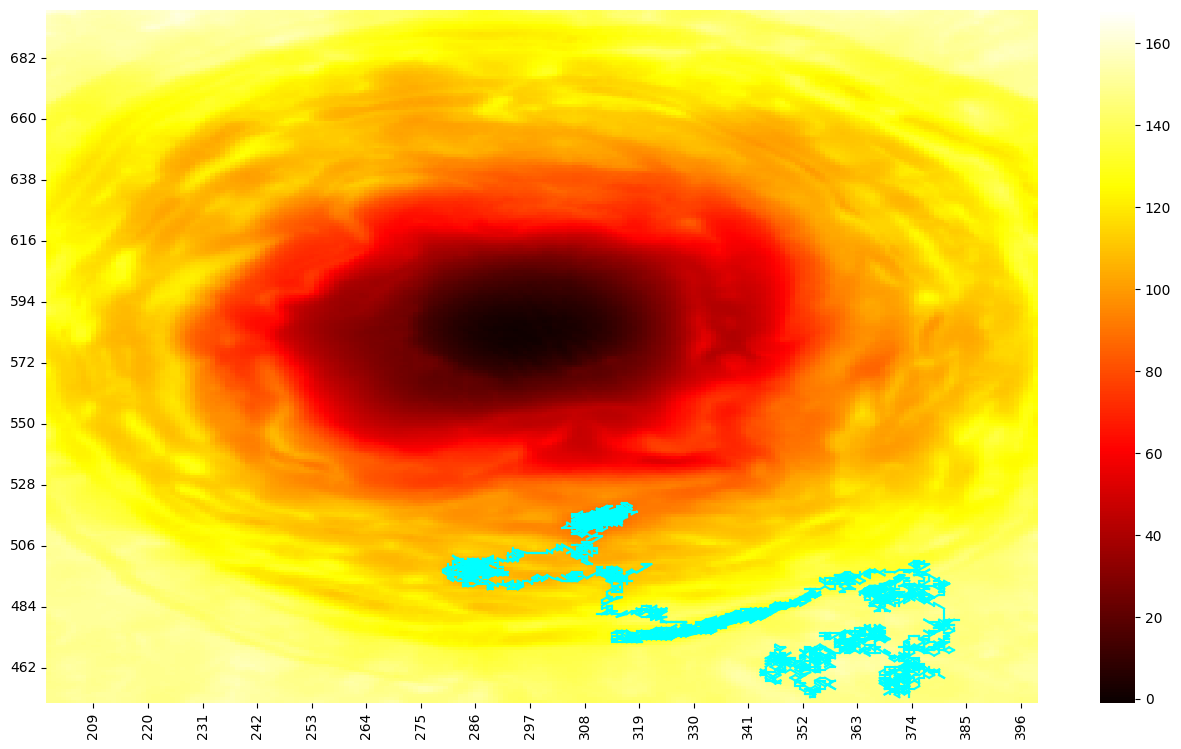

In [45]:
initial_row = get_row(NR, custom_points[4][1], SCALE)
initial_column = get_column(custom_points[4][0], SCALE)
initial_rover = Rover(crater_map, (initial_row, initial_column), [])
simulated_annealing(initial_row, initial_column, initial_rover)